# Atividade 03 - Parte 01

In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image, display

## Função para determinar a classe de estabilidade de Pasquill 

In [2]:
def pasquill(periodo):
    if periodo=='dia':
        # Gerando valor aleatório para radiação solar (Monte-Carlo)
        solar = np.random.rand(1)
        Max = 1000
        Min = 200
        solar = (Max-Min)*solar + Min
        # Gerando valor aleatório para velocidade do vento (Monte-Carlo)
        vento = np.random.rand(1)
        Max = 10
        Min = 0
        vento = (Max-Min)*vento + Min
        return {'Radiação solar (W/m2)': [solar[0]], 
                'Velocidade do vento (m/s)': [vento[0]]} 
    if periodo=='noite':
        # Gerando valor aleatório para cobertura de nuvens
        nuvens = np.random.randint(0,9)
        # Gerando valor aleatório para velocidade do vento (Monte-Carlo)
        vento = np.random.rand(1)
        Max = 10
        Min = 2
        vento = (Max-Min)*vento + Min
        return {'Cobertura de nuvens': [str(nuvens)+'/8'], 
                'Velocidade do vento (m/s)': [vento[0]]} 

## Função de estimativa de coefiente de dispersão (sigmaYZ) para todas as classes de estabilidade

In [3]:
# Função para estimar as dispersões lateral e vertical da pluma 
def sigmasYZ(UR, classe, x):
    if (classe=='A' or classe=='B') and UR=='urbano':
        sigmaY = 0.32*x*((1+0.0004*x)**(-0.5)) 
        sigmaZ = 0.24*x*((1+0.001*x)**(0.5)) 
    if classe=='C' and UR=='urbano':
        sigmaY = 0.22*x*((1+0.0004*x)**(-0.5)) 
        sigmaZ = 0.20*x 
    if classe=='D' and UR=='urbano':
        sigmaY = 0.16*x*((1+0.0004*x)**(-0.5)) 
        sigmaZ = 0.14*x*((1+0.0003*x)**(-0.5))
    if (classe=='E' or classe=='F') and UR=='urbano':
        sigmaY = 0.11*x*((1+0.0004*x)**(-0.5)) 
        sigmaZ = 0.08*x*((1+0.0015*x)**(-0.5)) 
    if classe=='A' and UR=='rural':
        sigmaY = 0.22*x*((1+0.0001*x)**(-0.5)) 
        sigmaZ = 0.20*x 
    if classe=='B' and UR=='rural':
        sigmaY = 0.16*x*((1+0.0001*x)**(-0.5))
        sigmaZ = 0.12*x      
    if classe=='C' and UR=='rural':
        sigmaY = 0.11*x*((1+0.0001*x)**(-0.5))
        sigmaZ = 0.08*x*((1+0.0002*x)**(-0.5))           
    if classe=='D' and UR=='rural':
        sigmaY = 0.08*x*((1+0.0001*x)**(-0.5))
        sigmaZ = 0.06*x*((1+0.0015*x)**(-0.5))      
    if classe=='E' and UR=='rural':
        sigmaY = 0.06*x*((1+0.0001*x)**(-0.5))
        sigmaZ = 0.03*x*((1+0.0003*x)**(-1))
    if classe=='F' and UR=='rural':
        sigmaY = 0.04*x*((1+0.0001*x)**(-0.5))
        sigmaZ = 0.016*x*((1+0.0003*x)**(-1))
    return {'Sigma Y': [sigmaY], 'Sigma Z': [sigmaZ]} 

## Função de estimativa de sobrelevação da pluma

In [4]:
# Gerando valores aleatórios para u, Vs & Ts (Monte-Carlo)
def variaveis():
    u = np.random.rand(1) # velocidade do vento na altura da chaminé
    Max = 10
    Min = 0
    u = (Max-Min)*u + Min
    Vs = np.random.rand(1) # velocidade dos gases na saída da chaminé
    Max = 10
    Min = 0
    Vs = (Max-Min)*Vs + Min
    Ts = np.random.rand(1) # temperatura dos gases na saída da chaminé 
    Max = 700
    Min = 400
    Ts = (Max-Min)*Ts + Min
    return{'Velocidade do vento (m/s)': [u[0]], 
           'Velocidade dos gases (m/s)': [Vs[0]], 
           'Temperatura dos gases (K)': [Ts[0]], 
           'Diâmetro da chaminé (m)': [1]} 

In [5]:
# Método de Davidson-Bryant 
def bryant(u, vs, ts, d):
    deltaH = d*((vs/u)**1.4)*(1+((ts-300)/ts))
    return deltaH 

In [6]:
# Método de Holland
def holland(u, vs, ts, d, classe):
    deltaH = (vs*d/u)*(1.5+(0.00268*1013*(ts-300)*d/ts))
    if classe=='A' or classe=='B' or classe=='C': # condições instáveis 
        deltaH = 1.15*deltaH # acréscimo de 15%
    else:
        deltaH = 0.85*deltaH # decréscimo de 15% 
    return deltaH 

In [7]:
# Análise do efeito Tip-Downwash e cálculo da altura efetiva
def Hef(Hg, dH, vs, u, d):
    if vs<(1.5*u):
        Hefetiva = Hg + (2*d*((vs/u)-1.5)) + dH 
    else:
        Hefetiva = Hg + dH
    return Hefetiva 

## Função do modelo gaussiano

In [8]:
def modeloGaussiano(qs, sigmaY, sigmaZ, u, y, z, H):
    termo1 = qs/(2*np.pi*sigmaY*sigmaZ*u)
    termo2 = np.exp((-y**2)/(2*sigmaY**2))
    termo3 = np.exp((-(z-H)**2)/(2*sigmaZ**2)) + np.exp((-(z+H)**2)/(2*sigmaZ**2))
    conc = termo1*termo2*termo3
    conc = conc*10**6
    return conc # micro g/m3 

# Simulações com o script 
CONAMA 491/2018: https://www.in.gov.br/web/guest/materia/-/asset_publisher/Kujrw0TZC2Mb/content/id/51058895/do1-2018-11-21-resolucao-n-491-de-19-de-novembro-de-2018-51058603

In [9]:
# OBS: nossas medias anuais em g/s:
# PM = 131.772771	
# PM-10	= 21.409322
# NOX = 1.393929	
# CO = 50.354440	
# VOC as propane = 84.648386  		

## PM10
Limite CONAMA 491 = 20 micro g/m3

In [28]:
df = pd.DataFrame(data=pasquill('dia'))
df

,Radiação solar (W/m2),Velocidade do vento (m/s)
0,467.464723,7.315898


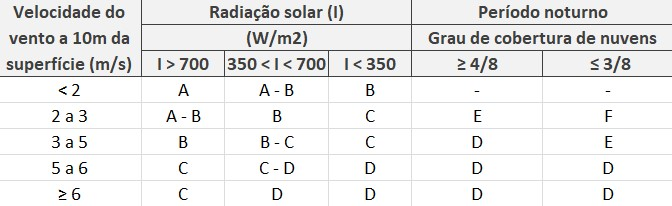

In [11]:
display(Image(filename="C:\\ENS5173\\inputs\\Pasquill.jpg"))

In [29]:
Classe = 'D'

In [30]:
sigmas = pd.DataFrame(data=sigmasYZ('urbano', Classe, 100)) 
sigmas

,Sigma Y,Sigma Z
0,15.689291,13.79461


In [31]:
dados = pd.DataFrame(data=variaveis())   
dados

,Velocidade do vento (m/s),Velocidade dos gases (m/s),Temperatura dos gases (K),Diâmetro da chaminé (m)
0,0.552669,3.891733,562.519877,1


In [32]:
dH1 = bryant(dados['Velocidade do vento (m/s)'][0],
            dados['Velocidade dos gases (m/s)'][0],
            dados['Temperatura dos gases (K)'][0],
            dados['Diâmetro da chaminé (m)'][0])
dH1

22.546883354465734

In [33]:
dH2 = holland(dados['Velocidade do vento (m/s)'][0],
              dados['Velocidade dos gases (m/s)'][0],
              dados['Temperatura dos gases (K)'][0],
              dados['Diâmetro da chaminé (m)'][0], 
              Classe)
dH2

16.56161259137826

In [34]:
HG = 30.0
HEF = Hef(HG, 
      dH2, 
      dados['Velocidade dos gases (m/s)'][0], 
      dados['Velocidade do vento (m/s)'][0], 
      dados['Diâmetro da chaminé (m)'][0])
HEF

46.561612591378264

In [35]:
QS = 21.409322*0.05 # media PM10 (anual) - (g/s)
Y = 1
Z = 1
Conc = modeloGaussiano(QS,
                       sigmas['Sigma Y'][0],
                       sigmas['Sigma Z'][0],
                       dados['Velocidade do vento (m/s)'][0],
                       Y,
                       Z,
                       HEF) 
Conc # micro g/m3 

9.807132863671193

## NOX
Limite CONAMA 491 = 40 micro g/m3

In [36]:
df = pd.DataFrame(data=pasquill('noite'))
df

,Cobertura de nuvens,Velocidade do vento (m/s)
0,2/8,8.289346


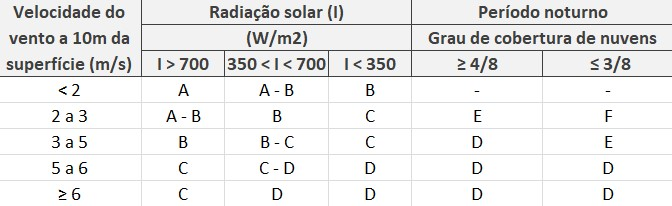

In [20]:
display(Image(filename="C:\\ENS5173\\inputs\\Pasquill.jpg"))

In [37]:
Classe = 'D'

In [38]:
sigmas = pd.DataFrame(data=sigmasYZ('urbano', Classe, 100)) 
sigmas

,Sigma Y,Sigma Z
0,15.689291,13.79461


In [39]:
dados = pd.DataFrame(data=variaveis())   
dados

,Velocidade do vento (m/s),Velocidade dos gases (m/s),Temperatura dos gases (K),Diâmetro da chaminé (m)
0,0.291989,4.457216,593.369963,1


In [40]:
dH1 = bryant(dados['Velocidade do vento (m/s)'][0],
            dados['Velocidade dos gases (m/s)'][0],
            dados['Temperatura dos gases (K)'][0],
            dados['Diâmetro da chaminé (m)'][0])
dH1

67.86528096261489

In [41]:
dH2 = holland(dados['Velocidade do vento (m/s)'][0],
              dados['Velocidade dos gases (m/s)'][0],
              dados['Temperatura dos gases (K)'][0],
              dados['Diâmetro da chaminé (m)'][0], 
              Classe)
dH2

36.87902677242384

In [45]:
HG = 30.0
HEF = Hef(HG, 
      dH2, 
      dados['Velocidade dos gases (m/s)'][0], 
      dados['Velocidade do vento (m/s)'][0], 
      dados['Diâmetro da chaminé (m)'][0])
HEF

66.87902677242384

In [46]:
QS = 1.393929 # media NOX (anual) - (g/s)
Y = 1
Z = 1
Conc = modeloGaussiano(QS,
                       sigmas['Sigma Y'][0],
                       sigmas['Sigma Z'][0],
                       dados['Velocidade do vento (m/s)'][0],
                       Y,
                       Z,
                       HEF) 
Conc # micro g/m3

0.05842805803361682

Foram testadas diferentes classes, tanto de dia quanto à noite, e a altura ideal de chaminé é de 30m.
Para adequação das emissões material particulado, foi proposta a instalação de filtros de manga nas chaminés, pois estes diminuem de 95 a 99% das emissões. (As simulações foram feitas considerando que 5% do que é emitido chega à atmosfera). 

## Figuras e discussão dos resultados